# Topic Modeling Assessment - Due by 9/4/2020 - 4pm

For this assignment you will be working with a dataset of  quora questions (please download from eLearning) that have no labeled cateogry and attempt to find representtaive topics for the questions. Try different topic modeling appraoches discussed in the class. 

The choice of number of topics will depend on what number gives you meaningful topics. Please explain different topics that you have extracted.

Inspiration taken from - https://towardsdatascience.com/topic-modeling-of-2019-hr-tech-conference-twitter-d16cf75895b6

In [120]:
import warnings
warnings.filterwarnings('ignore')

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Topic Modeling with LDA - SKlearn

Import Libraries

## Install Libraries

In [122]:
!pip install pyldavis

## Import Libraries

In [123]:
import pandas as pd
import re, pickle, os
import datetime 
import nltk
from nltk.util import ngrams
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords, wordnet 
from collections import Counter 
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
from gensim.corpora import MmCorpus
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Import Data File

## Import Data

In [124]:
data = pd.read_csv('/content/drive/My Drive/NLP/Assignment 1/quora_questions.csv')

In [125]:
data.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [126]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
import nltk

## Define Function: POS - Part of Speech

In [127]:
def get_wordnet_pos(word):
    """
    Map POS tag to first character lemmatize() accepts
    """
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [128]:
from gensim import  corpora

In [129]:
data['Question']

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
404284    How many keywords are there in the Racket prog...
404285            Do you believe there is life after death?
404286                                    What is one coin?
404287    What is the approx annual cost of living while...
404288                What is like to have sex with cousin?
Name: Question, Length: 404289, dtype: object

## Define STOP Words corpus

In [130]:
additional_stop_words=['hrtechconf','peopleanalytics','hrtech','hr','hrconfes',
                       'hrtechnology','voiceofhr','hrtechadvisor','gen','wait',
                       'next','see','hcm','booth','tech','la','vega','last',
                       'look','technology','work', 'announce','product','new',
                       'team','use','happen','time','take','make','everyone',
                       'anyone','week','day','year','let','go','come','word',
                       'employee','get','people','today','session','need',
                       'meet','help','talk','join','start','awesome','great',
                       'achieve','job','tonight','everyday','room','ready',
                       'one','company','say','well','data','share','love',
                       'want','like','good','business','sure','miss','demo',
                       'live','min','play','always','would','way','almost',
                       'thank','still','many','much','info','wow','play','full',
                       'org','create','leave','back','front','first','may',
                       'tomorrow','yesterday','find','stay','add','conference',
                       'top','stop','expo','hall','detail','row','award','hey',
                       'continue','put','part','whole','some','any','everywhere',
                       'convention','center','forget','congratulation','every',
                       'agenda','gift','card','available','behind','meeting',
                       'best','happen','unlockpotentialpic','half','none',
                       'human', 'resources','truly','win','possible','thanks',
                       'know','check','visit','fun','give','think','forward',
                       'twitter','com','pic','rt','via']

## Define Function - Text CleanUp

In [131]:
def text_cleanup(text):  
    '''
    Text pre-processing
        return tokenized list of cleaned words
    '''
    # Convert to lowercase
    text_clean = text.lower()
    # Remove non-alphabet
    text_clean = re.sub(r'[^a-zA-Z]|(\w+:\/\/\S+)',' ', text_clean).split()    
    # Remove short words (length < 3)
    text_clean = [w for w in text_clean if len(w)>2]
    # Lemmatize text with the appropriate POS tag
    lemmatizer = WordNetLemmatizer()
    text_clean = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in text_clean]
    # Filter out stop words in English 
    stops = set(stopwords.words('english')).union(additional_stop_words)
    text_clean = [w for w in text_clean if w not in stops]
    
    return text_clean

In [132]:
cleaned_data_df = data.copy(deep=True)

In [133]:
cleaned_data_df

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."
...,...
404284,How many keywords are there in the Racket prog...
404285,Do you believe there is life after death?
404286,What is one coin?
404287,What is the approx annual cost of living while...


In [134]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Tokenization

In [135]:
cleaned_data_df['token'] = [text_cleanup(x) for x in data['Question']]

In [136]:
cleaned_data_df

,Question,token
0,What is the step by step guide to invest in sh...,"[step, step, guide, invest, market, india]"
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,"[story, kohinoor, koh, noor, diamond]"
2,How can I increase the speed of my internet co...,"[increase, speed, internet, connection, vpn]"
3,Why am I mentally very lonely? How can I solve...,"[mentally, lonely, solve]"
4,"Which one dissolve in water quikly sugar, salt...","[dissolve, water, quikly, sugar, salt, methane..."
...,...,...
404284,How many keywords are there in the Racket prog...,"[keywords, racket, program, language, late, ve..."
404285,Do you believe there is life after death?,"[believe, life, death]"
404286,What is one coin?,[coin]
404287,What is the approx annual cost of living while...,"[approx, annual, cost, living, study, uic, chi..."


## Collect Text

In [137]:
data_text = [word for i in cleaned_data_df['token'] for word in i]

In [138]:
data_text[0:5]

['step', 'step', 'guide', 'invest', 'market']

## Define Function - WORD Count

In [139]:
def get_word_count(tweets_text, num_gram):
    '''
    Get common word counts
    '''
    n_grams = list(ngrams(tweets_text, num_gram))
    common_words = Counter(n_grams).most_common()
    word_count = pd.DataFrame(data = common_words, 
                              columns=['word','frequency']) 
    # Convert list to string
    word_count['word'] = word_count['word'].apply(' '.join)
    # Plot word count graph
    word_count.head(20).sort_values('frequency').plot.barh(
            x='word', y='frequency', title='Word Frequency',figsize=(15,20))
    # # plt.savefig(WORD_COUNT_FILE)
    # print ('Word count saved\n')
    # plt.close('all')
    
    return word_count

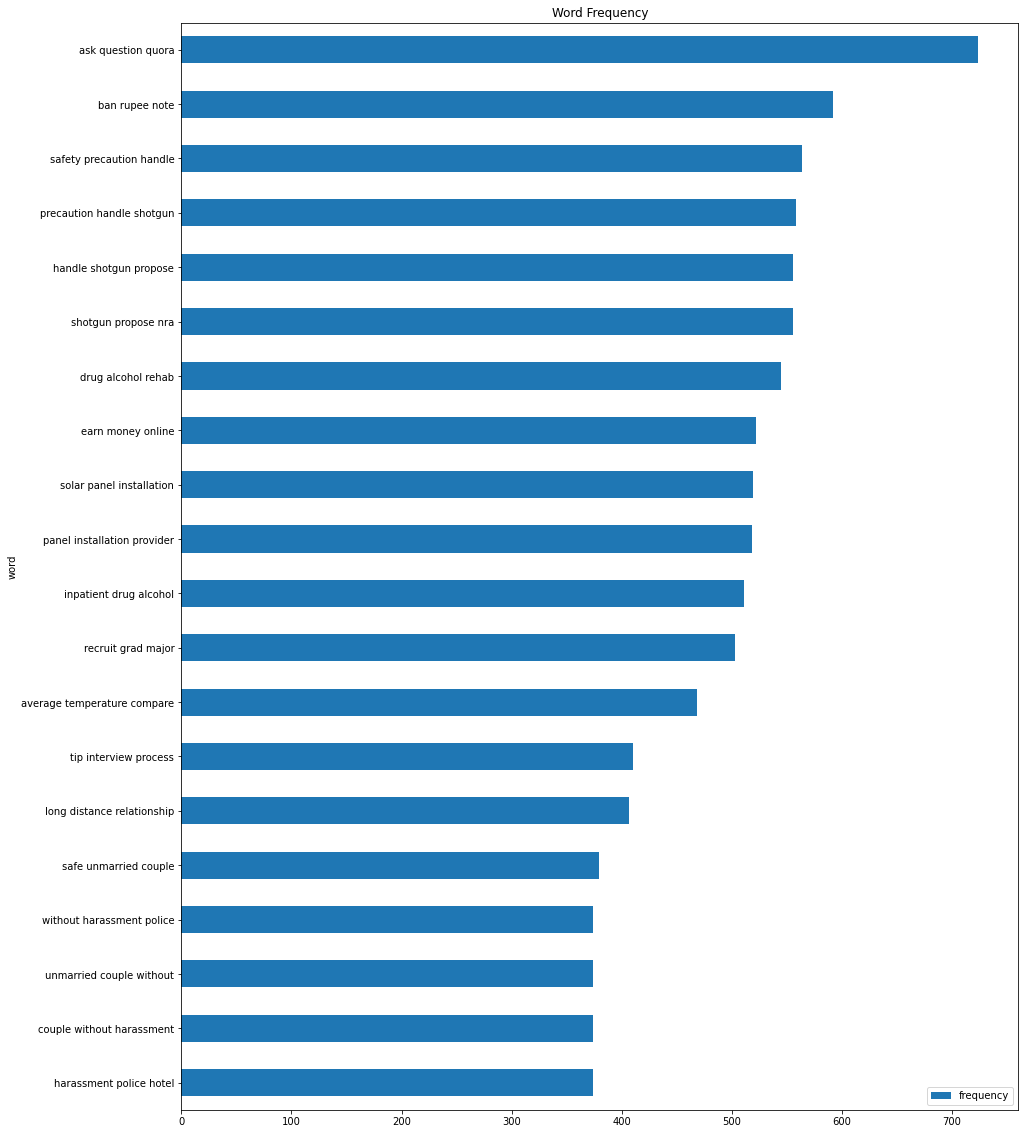

In [140]:
word_count_df = get_word_count(data_text,num_gram=3)

## Define Function - Word Cloud

In [141]:
def wordcloud(word_count_df):
    '''
    Create word cloud image
    '''
    # Convert DataFrame to Map so that word cloud can be generated from freq
    word_count_dict = {}
    for w, f in word_count_df.values:
        word_count_dict[w] = f
    # Generate word cloud 
    wordcloud = WordCloud(max_words=300, width=1400, height=900, 
                          random_state=12, contour_width=3, 
                          contour_color='firebrick')
    wordcloud.generate_from_frequencies(word_count_dict)
    plt.figure(figsize=(10,10), facecolor='k')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    
    return wordcloud

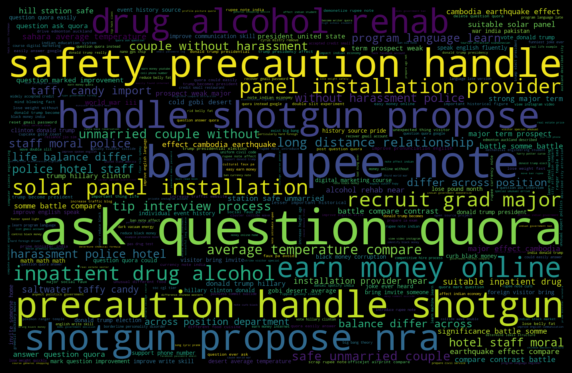

In [142]:
data_wordcloud = wordcloud(word_count_df)

## Define Function - Word Gram

In [143]:
def word_grams(words, min=1, max=2):
    '''
    Build ngrams word list
    '''
    word_list = []
    for n in range(min, max):
        for ngram in ngrams(words, n):
            word_list.append(' '.join(str(i) for i in ngram))
    return word_list

In [144]:
    # Generate ngram tokens
    cleaned_data_df['ngram_token'] = [word_grams(x, 2, 2+1) for 
                     x in cleaned_data_df['token']]

## Define Function - Evaluate Model LDA

In [145]:
def eval_lda (lda_model, corpus, dict, token_text):
    # Compute Perplexity: a measure of how good the model is. lower the better.
    print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=token_text, 
                                         dictionary=dict, 
                                         coherence='c_v')   
    print('\nCoherence: ', coherence_model_lda.get_coherence())


## Define Viz - pyLDAvis

In [146]:

def vis_topics(lda_model, corpus, dict1):
    '''
    Plot generated topics on an interactive graph
    '''
    lda_data =  pyLDAvis.gensim.prepare(lda_model, 
                                        corpus, 
                                        dict1, 
                                        mds='mmds')
    print('start viz')
    pyLDAvis.display(lda_data)

## Train Model

In [147]:
print('Start LDA model training ...\n')    
# Build dictionary
data_dict = corpora.Dictionary(cleaned_data_df['ngram_token'])
# Remove words that occur less than 10 documents, 
# or more than 50% of the doc
data_dict.filter_extremes(no_below=10, no_above=0.5)
# Transform doc to a vectorized form by computing frequency of each word
bow_corpus = [data_dict.doc2bow(doc) for doc in cleaned_data_df['ngram_token']]
# Create tf-idf model and then apply transformation to the entire corpus
tfidf = models.TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]

# Train LDA model
lda_model = models.ldamodel.LdaModel(corpus=tfidf_corpus, 
                                      num_topics=10, 
                                      id2word=data_dict, 
                                      passes=5, 
                                      alpha=0.001, 
                                      eta='auto',
                                      random_state=50)

Start LDA model training ...



## Compute Coherence & Perplexity

In [148]:
# Compute Perplexity: a measure of how good the model is. lower the better.
print('\nPerplexity: ', lda_model.log_perplexity(tfidf_corpus))
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, 
                                      texts=cleaned_data_df['ngram_token'], 
                                      dictionary=data_dict, 
                                      coherence='c_v')   
print('\nCoherence: ', coherence_model_lda.get_coherence())


Perplexity:  -13.595538447544563

Coherence:  0.7484210725905706


## Plot Model

In [149]:

'''
Plot generated topics on an interactive graph
'''
lda_data =  pyLDAvis.gensim.prepare(lda_model, 
                                    tfidf_corpus, 
                                    data_dict, 
                                    mds='mmds')
print('start viz')
pyLDAvis.display(lda_data)

start viz
